Below I have copied the introductory information for the project

# Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

# Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Dataset:

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone
 

### Objective:

To implement the techniques learned as a part of the course.


#### Learning Outcomes:

* Basic understanding of text pre-processing.
* What to do after text pre-processing
* Bag of words
* Tf-idf
* Build the classification model.
* Evaluate the Model

# 1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)

In [105]:
## Import the libraries that we will need ##
# Essential libraries
import numpy as np                                      
import pandas as pd 
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)
import warnings                                                           
warnings.filterwarnings("ignore")

# Plotting Libraries
import matplotlib.pyplot as plt                                        
import seaborn as sns       

# Pre-Processing
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup  
import re, unicodedata, nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer         

# Data Encoding
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# sklearn libraries for preparing model data and testing model performace
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Classifier and hyper parameter tuning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Model evaluation libraries
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")
data # print out the head and tail of the data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


* The number of columns (15), and the column titles match what we saw in the data description.
* It looks like, when the sentiment is not "negative" the negative_reason column is null. However, sometimes we see that the negativereason_confidence column is either zero or null (given a negative sentiment).

In [107]:
data.shape # get the shape of the data

(14640, 15)

There are 14640 rows - so 14640 different tweets. The number of columns is 15.

In [108]:
data.info() # display data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

* Most of the data are in object form - which is what we would expect. The tweet_id numbers and number of retweets are are integers while the confidence values are floats.
* There are a lot of null values in the data, 8 of the 15 columns have no null values, the other 7 columns have many null values.
* The airline_sentiment_gold and negativereason_gold columns are almost entirely null.

In [109]:
data.isnull().sum(axis=0) # display null counts per column

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

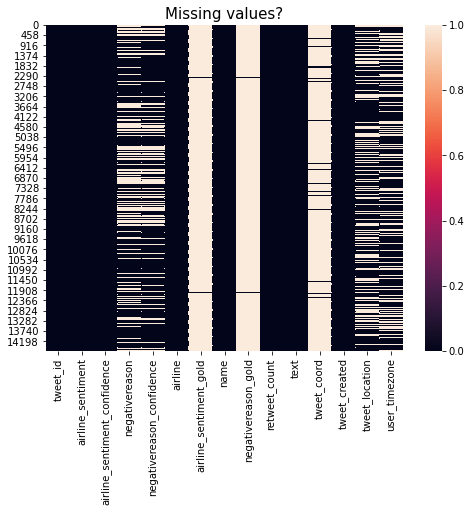

In [110]:
#Visualization of missing value using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  
plt.title("Missing values?", fontsize = 15)
plt.show()

* In the heat map above, the black colour shows where data are present, the red colour shows where data are missing. 
* Luckily the columns that are most important to the analysis that we will do: airline_sentiment, airline and text, have no missingness. 

In [111]:
# view some basic statistical details like percentile, mean, std etc. of a data frame of numeric values. 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


* tweet_id looks to be a large integer value and has little relevance to our goal.
* airline_sentiment_confidence appears to range from 0-1 but is heavily skewed towards 1.
* negativereason_confidence also appears to range from 0-1 with the distribution heavily weighted towards zero. Both the mean and median are very close to zero.

# 2. Do Exploratory data analysis(EDA) based on the below statement. (9 Marks)

### a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 

First, let's get some basic info, like the number of unique entries and the value counts for the 'airline' and 'airline_sentiment' columns. We already know that there are no null values in these columns.

In [112]:
# This will give us the number of unique entries and the counts per entry
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

* There are 6 airlines in the data, we will plot the distribution of the tweets amoungst the airlines a few lines down the page.

In [113]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

* Our values for sentiment are negative, neutral and positive.

In [114]:
data['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

* There are 10 categories in negative reason, with the most common at the top of the list and least common at the base of the list above.

##### Distribution of tweets among each airline

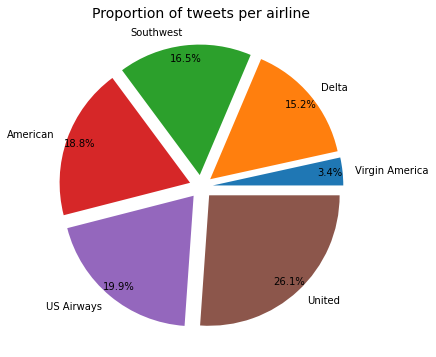

In [115]:
#Plot the distribution of airlines
Category=data['airline'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[10,6])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*6, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets per airline", fontsize=14);

* United has the most tweets at 26% of the data, the airlines in the middle of the distribution have 15-20% of the tweets, finally Virgin America has much less tweets than the others at only 3.4%

##### Distribution of sentiment across all tweets

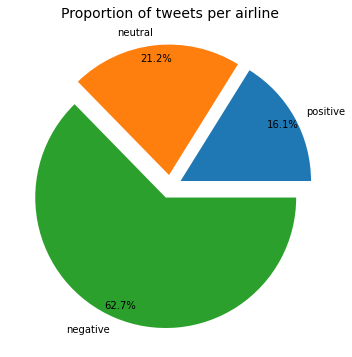

In [116]:
#Plot the distribution of sentiments
Category=data['airline_sentiment'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[10,6])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*3, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets per airline", fontsize=14);

* The majority of tweets express negative sentiment (63%)
* Only 16% of the tweets about the airlines were positive, with 21% being neutral.

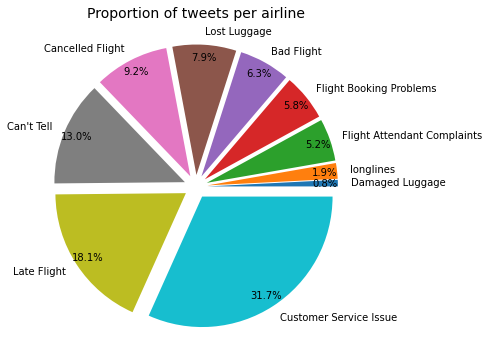

In [117]:
# Plot the distribution of negative reasons
Category=data['negativereason'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[10,6])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*10, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets per airline", fontsize=14);

* The most common negative reason was a customer service issue, with just under one-third of negative tweets stating this reason.
* Late flight was also a common complaint. Long lines and damaged luggage where the least common negative sentiment reasons.

### b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.

* I'm not sure if "the distribution of all the negative reasons" is the plot that I made directly above, or if I need it for each airline. So I will do both! The distribution of all the negative reasons *in general* is above. The distribution of negative reasons *per airline* is below.

* I think the easiest way to achieve this is to first just split the data into different dataframes, one per airline.

In [118]:
# create a separate df for each airline
United = data[data['airline']=='United']
USAir = data[data['airline']=='US Airways']
American = data[data['airline']=='American']
Southwest = data[data['airline']=='Southwest']
Delta = data[data['airline']=='Delta']
Virgin = data[data['airline']=='Virgin America']

In [119]:
# Now create a function to plot the negative sentiment and negative reason distributions
def airline_plot(dataframe):
    pie, ax = plt.subplots(figsize=[13,15])
    pie.tight_layout(pad=4.0)
    # Plot the sentiment
    plt.subplot(1, 2, 1) 
    Category=dataframe['airline_sentiment'].value_counts().sort_values()
    labels = Category.keys()
    plt.pie(x=Category, autopct="%.1f%%", explode=[0.07]*3, labels=labels, pctdistance=0.9)
    plt.title("Airline Sentiment Distribution")

    #Plot the negative reason
    plt.subplot(1, 2, 2) 
    Category=dataframe['negativereason'].value_counts().sort_index()
    labels = Category.keys()
    plt.pie(x=Category, autopct="%.1f%%", explode=[0.07]*10, labels=labels, pctdistance=0.9)
    plt.title("Negative Reason Distribution")

    plt.show()

Note that the colour scheme for sentiment and negative reason will remain constant throughout.

#### United - Airline Sentiment and Negative Reason Distribution

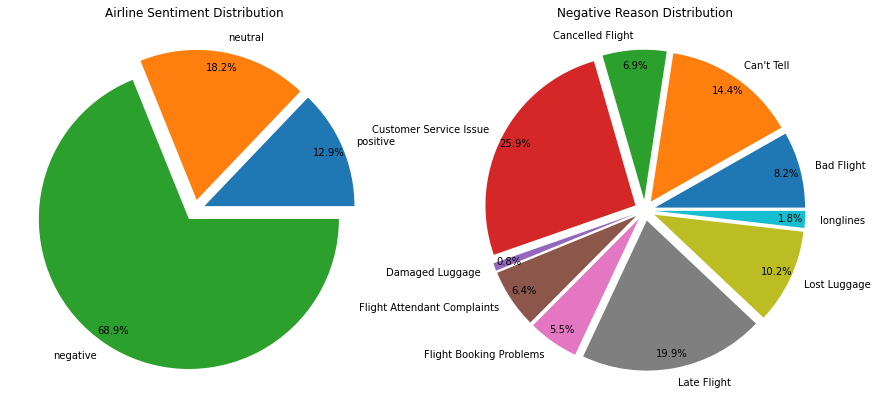

In [120]:
airline_plot(United)

* United airlines had the 3rd highest negative sentiment percentage. The highest percentage negative reason given was Customer Service Issue.

#### US Airways - Airline Sentiment and Negative Reason Distribution

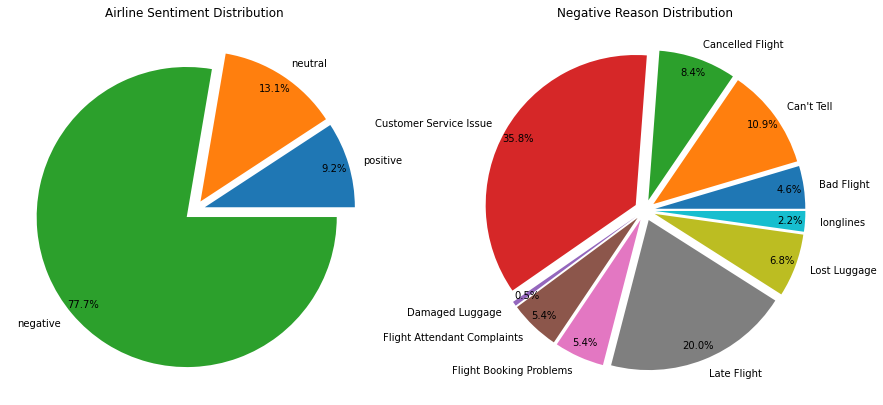

In [121]:
airline_plot(USAir)

* US Airways had the highest amount of negative sentiment. Customer service was the main negative reason.

#### American - Airline Sentiment and Negative Reason Distribution

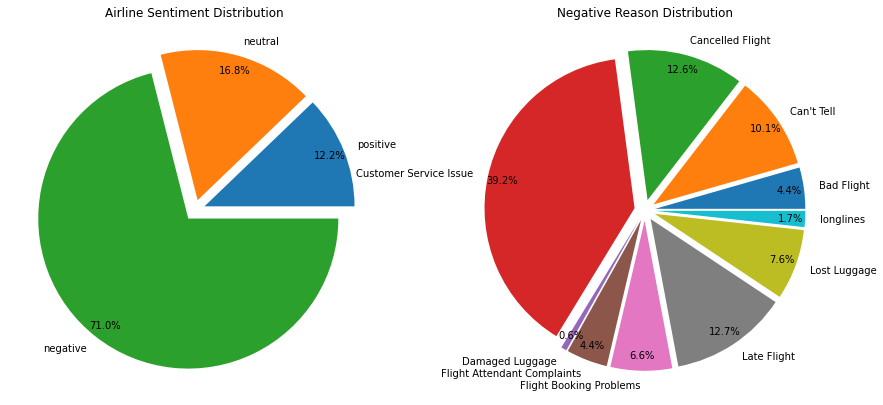

In [122]:
airline_plot(American)

* American had the 2nd highest percentage of negative sentiment. Again, Customer Service was the main negative reason.

#### Southwest - Airline Sentiment and Negative Reason Distribution

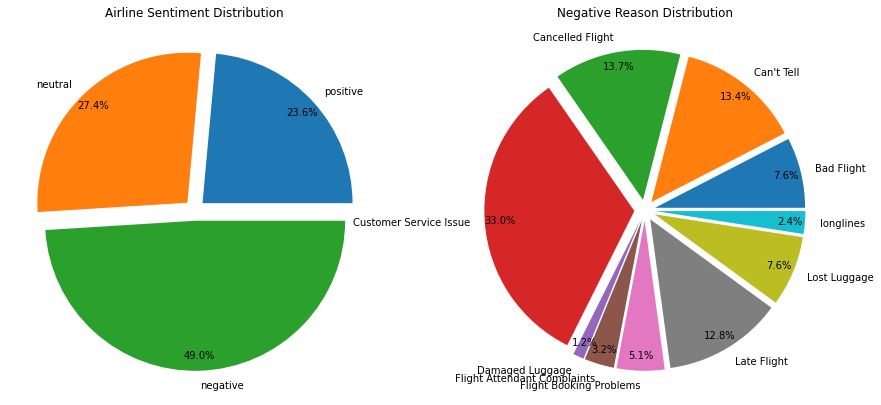

In [123]:
airline_plot(Southwest)

* Southwest had approximately half of its sentiment as negative, a big drop from the three airlines listed above. Again Customer Service was the main cause of complaint.

#### Delta - Airline Sentiment and Negative Reason Distribution

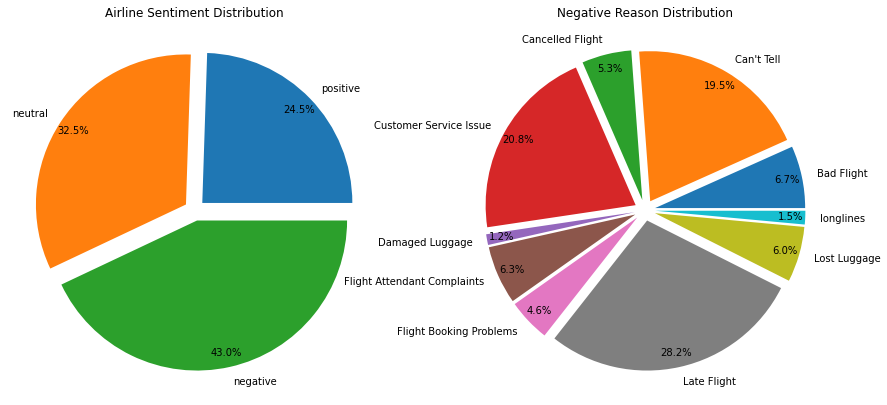

In [124]:
airline_plot(Delta)

* Delta had the 2nd least amount of negative sentiment. Unline the other airlines, late flight was the highest percentage of negative reason.

#### Virgin America - Airline Sentiment and Negative Reason Distribution

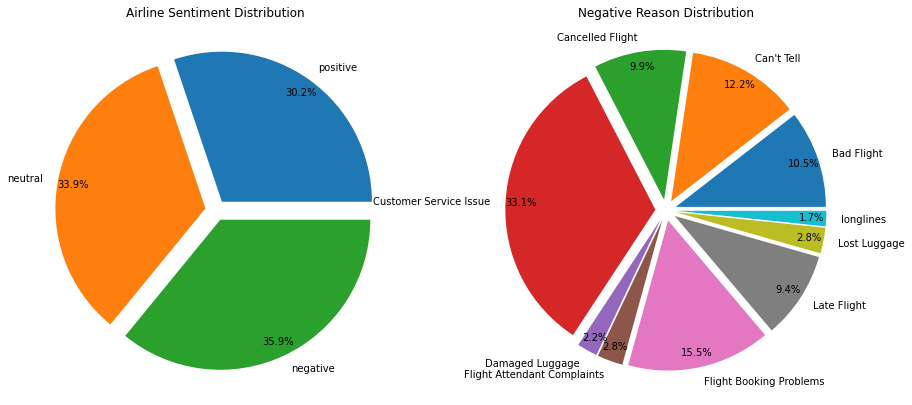

In [125]:
airline_plot(Virgin)

* Virgin America has the highest positive sentiment and lowest negative sentiment. We can see that there is a much higher percentage of "Flight Booking Problems" stated as the reason for negative sentiment with Virgin than the other airlines.

**Observations**  
* Virgin America had the least negative sentiments 36% and the most positive sentiments 30%
* US Airways had the most negative sentiments 78% and the least positive sentiments 9%
* For all airlines, except Virgin America the number of negative tweets is *at least* double the amount of positive tweets. For Virgin the ratio is close to 1:1.
* For most airlines "Customer Service Issue" was the most often stated negative reason. Delta was the only exeption with Late flight being the most common negative reaon (customer service was the 2nd most stated for Delta)

### c. Plot the word cloud graph of tweets for positive and negative sentiment separately.

Again, we will just split the data into separate data frames and then plot the word cloud for each one. It doesn't make sense to plot a word cloud without first removing stopwords, so we will make use of the STOPWORDS library from wordcloud.

#### Positive Sentiment Tweets Word Cloud

In [126]:
positive_tweets=data[data['airline_sentiment']=='positive'] # create a df with only positive tweets
words = ' '.join(positive_tweets['text'])
cleaned_word = " ".join([word for word in words.split()     # clean out some of the clutter from the tweets
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [127]:
# Create the wordcloud specifiying our stopwords libriary
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

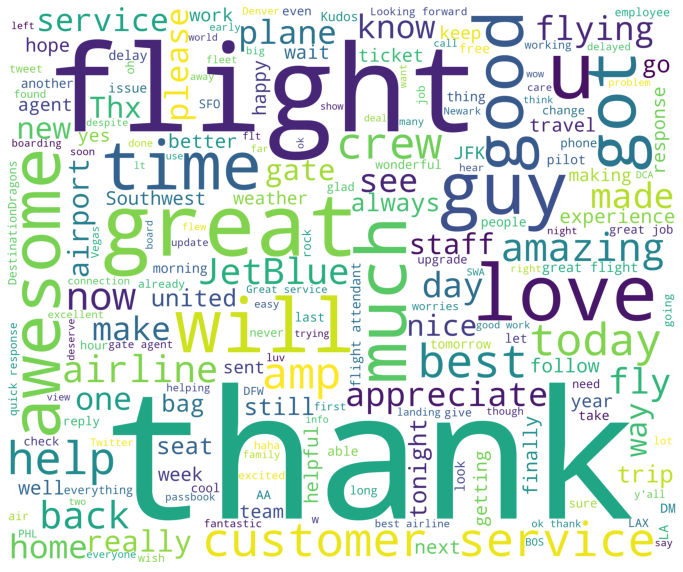

In [128]:
# Plot the wordcloud
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Negative Sentiment Tweets Word Cloud

In [129]:
negative_tweets=data[data['airline_sentiment']=='negative'] # separate negative tweets from data
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()     # clean up common clutter in tweets
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [130]:
# Create wordcloud, specifiying stopwords
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

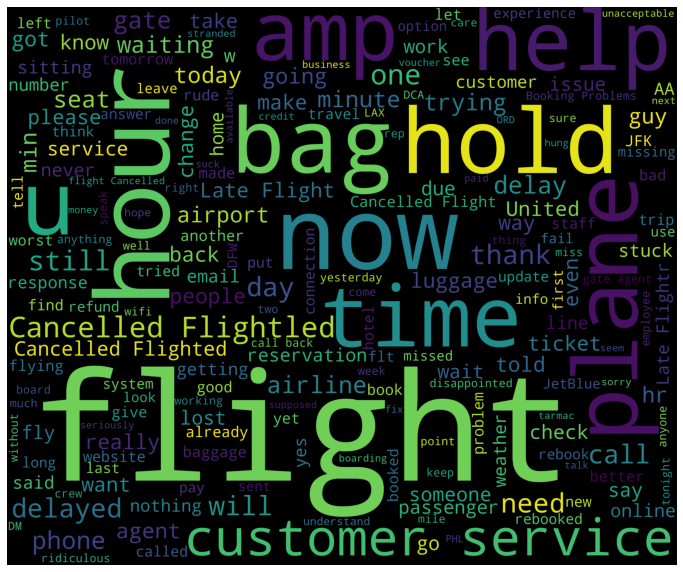

In [131]:
# Plot the wordcloud
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observations**
* In the positive word cloud, we see words like: good, great, love, amazing and helpful. Obviously positive words.
* In the negative word cloud there are words like: delayed, hold, cancelled flight, stuck, nothing, waiting, problem. Obviously negative words.
* We see customer service appear in both the positive and negaitve word cloud, so it appears that this is something that people express both positive and negative opinions on. Although, given that customer service was the most stated reason in the "negativereason" column, we can assume that people complain about customer service more often than they praise it.


# 3. Understand of data columns: (3 Marks)
###  a. Drop all other columns except “text” and “airline_sentiment”.

In [132]:
data.drop(['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence',
           'airline','airline_sentiment_gold','name','negativereason_gold','retweet_count',
           'tweet_coord','tweet_created','tweet_location','user_timezone'],axis=1,inplace=True)

### b. Check the shape of the data.

In [133]:
data.shape # data still has 14640 rows, be we have dropped down to our 2 columns: text and airline_sentiment

(14640, 2)

### c. Print the first 5 rows of data.

In [134]:
data.head()                                 # Print first 5 rows of data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


* It is interesting to note that not all of these labels are correct. We can see that index 1 has a positive label. However, this is actually someone expressing a negative sentiment. I think whoever (or the machine) that did the original labelling was confused by the word plus. However, the writer is stating that the addition (plus) of commercials is tacky. i.e. bad.
* Hopefully not too many of the labels are incorrect in the rest of the data set.

Just in case the assignment is asking us to *print* the first 5 lines of data...

In [135]:
for i in range(0,5):
    print(data.iloc[i])

airline_sentiment                                neutral
text                 @VirginAmerica What @dhepburn said.
Name: 0, dtype: object
airline_sentiment                                                                    positive
text                 @VirginAmerica plus you've added commercials to the experience... tacky.
Name: 1, dtype: object
airline_sentiment                                                                    neutral
text                 @VirginAmerica I didn't today... Must mean I need to take another trip!
Name: 2, dtype: object
airline_sentiment                                                                                                                          negative
text                 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
Name: 3, dtype: object
airline_sentiment                                                   negative
text                 @VirginAmerica and it's a 

I actually think it's more useful to print the first 5 lines of text so that we can compare it to the pre-processed data later on...

In [136]:
for i in range(0,5):
    print(data.iloc[i,1])

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it


# 4. Text pre-processing: Data preparation. (12 Marks)
#### **NOTE:-** Each text pre-processing step should be mentioned in the notebook separately.

### a. Html tag removal.
We will use the BeautifulSoup library to remove the Html tags. It's not in the rubric, but at this stage we will also remove urls and expand contractions to make the next data processing steps easier.

In [137]:
data_original = data.copy() # copy the data before we mess with it, in case we need to start over.

In [138]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


#### a., part 2 remove urls
This next step is not in the marking rubric, but I found that without it, I was getting "http" in my list of top features when modelling. So we will remove urls.

In [139]:
# remove the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

data['text'] = data['text'].apply(lambda x: remove_url(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


#### a., part 3 expand contractions
This also isn't on the list but I can see a lot of contractions and the pre-processing will work best if we expand them first. For some reason the contractions package will not install on my machine. However, the code below works well as a substitue.

In [140]:
def decontracted(phrase): 
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

data['text'] = data['text'].apply(lambda x: decontracted(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


The above looks much nicer and should work better in the following steps. There are no html tags or urls in the first 5 lines that are visible. However I know that the url code worked as http no longer shows as a top feature in my models. We can also see that our code to expand contractions has worked well.

### b. Tokenization.
Here we will use the NLTK functionality to tokenize the words.

In [141]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


* **NOTE** after tokonization the open quotes for "entertainment" seems to have been replaced with `` rather than ". We will deal with this when we remove special characters in step d.

### c. Remove the numbers.
Here we will use re to remove any digits.

In [142]:
#remove the numericals present in the text
def remove_numericals(words):
    """Remove numerical characters from list of tokenized words"""
    new_words = []
    for word in words:
        #new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_word = re.sub(r'\d+', '', word)
        new_words.append(new_word)
    return new_words

data['text'] = data['text'].apply(lambda x: remove_numericals(x))
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


### d. Removal of Special Characters and Punctuations.

First we will replace any non-English characters like the e with the little ~ hat on top with their English approximations (e in this case). To do this we will use unicodedata. Following that we will remove anything that is not an upper or lowercase letter of the alphabet using re.

In [143]:
# This first function will replace any non English characters with their English approximations
def remove_non_ascii (words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

data['text'] = data['text'].apply(lambda x: remove_non_ascii(x))
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


* Next we will remove punctuation, basically anything that isn't a letter of the alphabet (upper or lower)

In [144]:
# This function will remove anything that is not a letter of the alphabet
# So all special characters, like @#% will be removed, and all punctuation, like !?. will be removed
def remove_special_characters(words):
    """Remove special characters from list of tokenized words"""
    new_words = []
    for word in words:
        pattern = r'[^a-zA-z\s]'
        new_word = re.sub(pattern, '', word)
        new_words.append(new_word)
    return new_words

data['text'] = data['text'].apply(lambda x: remove_special_characters(x))
data.head()

,airline_sentiment,text
0,neutral,"[, VirginAmerica, What, , dhepburn, said, ]"
1,positive,"[, VirginAmerica, plus, you, have, added, commercials, to, the, experience, , tacky, ]"
2,neutral,"[, VirginAmerica, I, did, not, today, , Must, mean, I, need, to, take, another, trip, ]"
3,negative,"[, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, , in, your, guests, , faces, , they, have, little, recourse]"
4,negative,"[, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


* **NOTE** It appears that the `` (in index 3) had been retained by the above function. For this reason we will run re again and specifically target the ` symbol.

In [145]:
# This run of the function will specifically target the ` symbol that is being problematic.
def remove_special_character(words):
    """Specifically target ` symbol for removal"""
    new_words = []
    for word in words:
        pattern = r'[`]'
        new_word = re.sub(pattern, '', word)
        new_words.append(new_word)
    return new_words

data['text'] = data['text'].apply(lambda x: remove_special_character(x))
data.head()

,airline_sentiment,text
0,neutral,"[, VirginAmerica, What, , dhepburn, said, ]"
1,positive,"[, VirginAmerica, plus, you, have, added, commercials, to, the, experience, , tacky, ]"
2,neutral,"[, VirginAmerica, I, did, not, today, , Must, mean, I, need, to, take, another, trip, ]"
3,negative,"[, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, , entertainment, , in, your, guests, , faces, , they, have, little, recourse]"
4,negative,"[, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


That seems to have worked, the open quotes (") which were replaced with (``) have now been correctly removed. Furthermore, we can see that all the only remaining characters are upper and lower case letters.

### e. Removal of stopwords.
We will use the NLTK stopwords library and subract the stopwords from the words in our corpus. However, we will customize the list of stopwords slightly. We will not be removing "no" and "not" as these words are essential to determining negative sentiment. For example if a tweet states, "not good", we will obviously incorrectly classify the sentiment if the word "not" is removed.

In [146]:
stopwords = stopwords.words('english') 
customlist = ['not', 'no'] # These stop words are important to negative sentiment so we will keep them.
stopwords = list(set(stopwords) - set(customlist))

In [147]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
data.head()

,airline_sentiment,text
0,neutral,"[, VirginAmerica, What, , dhepburn, said, ]"
1,positive,"[, VirginAmerica, plus, added, commercials, experience, , tacky, ]"
2,neutral,"[, VirginAmerica, I, not, today, , Must, mean, I, need, take, another, trip, ]"
3,negative,"[, VirginAmerica, really, aggressive, blast, obnoxious, , entertainment, , guests, , faces, , little, recourse]"
4,negative,"[, VirginAmerica, really, big, bad, thing]"


We can see that the stopwords have been removed and the word "not" is still in the document. So our customization and implementation of stopwords has worked.

### f. Conversion to lowercase.

In [148]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

data['text'] = data['text'].apply(lambda x: to_lowercase(x))
data.head()

,airline_sentiment,text
0,neutral,"[, virginamerica, what, , dhepburn, said, ]"
1,positive,"[, virginamerica, plus, added, commercials, experience, , tacky, ]"
2,neutral,"[, virginamerica, i, not, today, , must, mean, i, need, take, another, trip, ]"
3,negative,"[, virginamerica, really, aggressive, blast, obnoxious, , entertainment, , guests, , faces, , little, recourse]"
4,negative,"[, virginamerica, really, big, bad, thing]"


We can see that all characters are now lowercase.

### g. Lemmatize or stemming
We will use Lemmatize here. It's more accurate than stemming and we're not overly concerned about speed or memory constraints with these data.

In [149]:
#nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

In [150]:
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word))
    return new_words

data['text'] = data['text'].apply(lambda x: lemmatize_list(x))
data.head()

,airline_sentiment,text
0,neutral,"[, virginamerica, what, , dhepburn, said, ]"
1,positive,"[, virginamerica, plus, added, commercial, experience, , tacky, ]"
2,neutral,"[, virginamerica, i, not, today, , must, mean, i, need, take, another, trip, ]"
3,negative,"[, virginamerica, really, aggressive, blast, obnoxious, , entertainment, , guest, , face, , little, recourse]"
4,negative,"[, virginamerica, really, big, bad, thing]"


At index 1, we can see the word "commercials" has been changed to "commercial". At index 3, "faces" has changed to "face". So it appears that our lemmatization has worked.

### h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)

In [151]:
data['text'] = data['text'].apply(lambda x: ' '.join(x))
data.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus added commercial experience tacky
2,neutral,virginamerica i not today must mean i need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guest face little recourse
4,negative,virginamerica really big bad thing


Our text data is no longer separate, tokenized words. It is now processed text.

### i. Print the first 5 rows of data after pre-processing.

In [152]:
data.head() # This will print the first 5 rows of data

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus added commercial experience tacky
2,neutral,virginamerica i not today must mean i need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guest face little recourse
4,negative,virginamerica really big bad thing


In [153]:
# This will PRINT the first 5 rows of text. 
# I'm only doing this in case it is specifically required to forfil the marking rubric.
for i in range(0,5):
    print (data.iloc[i,1])

 virginamerica what  dhepburn said 
 virginamerica plus added commercial experience  tacky 
 virginamerica i not today  must mean i need take another trip 
 virginamerica really aggressive blast obnoxious  entertainment  guest  face  little recourse
 virginamerica really big bad thing


# 5. Vectorization: (8 Marks)
We will first split the data into X and y, separating out the labels so that our Vectorizer can work simply on the text data. We will then apply the CountVectorizer and TfidfVectorizer tools from sklearn to vectorize our text data.

##### Split data into X and y

In [154]:
X = data['text'] # Separate out the text data for X
X.head() # Check data, looks good

0                                                               virginamerica what  dhepburn said 
1                                           virginamerica plus added commercial experience  tacky 
2                                   virginamerica i not today  must mean i need take another trip 
3     virginamerica really aggressive blast obnoxious  entertainment  guest  face  little recourse
4                                                               virginamerica really big bad thing
Name: text, dtype: object

In [155]:
y = data['airline_sentiment'] # Spearate out the sentiment data for y
y.head() # Check data, looks good

0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object

### a. Use CountVectorizer.
We will use CountVectorizer from sklearn to encode our data to a Document Term Matrix (DTM).

In [156]:
Count_vec = CountVectorizer(max_features=1000)  # keep only 1000 features as number of features will increase the processing time.
X_bow = Count_vec.fit_transform(X) # Create Bag of Words set using fit_transform
X_bow = X_bow.toarray()

In [157]:
X_bow.shape # check shape of train

(14640, 1000)

In [158]:
X_bow # look at sample of test DTM

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [159]:
X_bow.dtype # check data type of test data (we assume that train set will be same data type)

dtype('int64')

* After vectorization our data has 1000 columns (the maximum number of features that we specified and 14640 rows, the total number of tweets in the data.
* The lines of the matrix plotted above look sparse; it looks like, out of the 1000 words in the DTM, none of them are in the 36 locations we see in the matrix above.
* The data type is int64, which tells us our vectorizer has worked correctly, and simply counted the number of times the top 1000 words appear in each tweet as the values are integers.

### b. Use TfidfVectorizer.
* We will use TfidfVectorizer from sklearn to encode our data to a Term Frequency - Inverse Document Frequency Document Term Matrix (TF-idf DTM).

In [160]:
tfidf_vect = TfidfVectorizer(max_features=1000) # Instantiate the vectorizer, again using 1000 features
X_idf = tfidf_vect.fit_transform(X) # Create TF-idf data using fit_transform
X_idf = X_idf.toarray()

In [161]:
X_idf.shape # Check shape of train data set

(14640, 1000)

In [162]:
X_idf # look at sample of test data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [163]:
X_idf.dtype # check data type of test data

dtype('float64')

* After vectorization using TF-idf, the shape of our data looks correct.
* As above, none of the 1000 words in the DTM are in the locations plotted. However, the data type is float64 meaning the TF-idf has given fractional values in locations of the matrix. This indicates it has weighted the words based on their frequency.

### Split the Data into Test and Train Sets for both Vectorization methods.
Our sentiment classes are unbalanced. In order to keep the same proportions of each class in the test and train data, we will use stratify when splitting the data.

In [164]:
# Split the data, using stratify to keep the same proportions of +ve, -ve and neutral
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.3, stratify=y, random_state=42)
X_train_idf, X_test_idf, y_train_idf, y_test_idf = train_test_split(X_idf, y, test_size=0.3, stratify=y, random_state=42)

##### Check proportions after split

In [165]:
# We can check the percentage of the split using the X data
print("{0:0.2f}% data is in training set".format((len(X_train_bow)/len(X)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test_bow)/len(X)) * 100))

70.00% data is in training set
30.00% data is in test set


In [166]:
print('Proportions in the Original Data')
print((y.value_counts() / len(y))*100)
print()
print('Proportions in Train Data')
print((y_train_bow.value_counts() / len(y_train_bow))*100)
print()
print('Proportions in Test Data')
print((y_test_bow.value_counts() / len(y_test_bow))*100)

Proportions in the Original Data
negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64

Proportions in Train Data
negative    62.695160
neutral     21.165105
positive    16.139735
Name: airline_sentiment, dtype: float64

Proportions in Test Data
negative    62.682149
neutral     21.174863
positive    16.142987
Name: airline_sentiment, dtype: float64


In [167]:
y_train_bow # check the index order of the CountVectorizer data

5417     negative
14211    negative
3844     negative
3909      neutral
14271    negative
           ...   
10545    negative
305      negative
10579    negative
7128     positive
7131     negative
Name: airline_sentiment, Length: 10248, dtype: object

In [168]:
y_train_idf # check the index order of the TF-idf data

5417     negative
14211    negative
3844     negative
3909      neutral
14271    negative
           ...   
10545    negative
305      negative
10579    negative
7128     positive
7131     negative
Name: airline_sentiment, Length: 10248, dtype: object

* We have split the data into X and y sets and then then vectorized the X data using two different methods.
* We then split the data, from each method, into train and test data.
* The proportion of data in the test set was verified to be 30% as intended.
* The proportion of positive, negative and neutral tweets in the training and test set is the same as the original.
* While we checked the proportions only from the CountVectorizer data; given the the same random_state variable was used to split both data sets AND the indexing is exactly the same in both data sets, we can assume the same proportions are in the TF-idf data.
* We can now move onto modelling with our data.

# 6. Modelling , tuning and Evaluation
*- Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks)*

In both the exmples in the course material, a random forest classifier has been used. That is what I will use here.

## Run Model and Tune Using Bag Of Words Input
We will create a random forest classification model using the training data. We will then evaluate it using a cross-validation. We will then attempt to tune the model using RandomSearch and then evaluate using a cross-validation and then finally our test data.

##### Initial Model and Performance

In [169]:
# Initialize a Random Forest classifier with 10 trees
forest = RandomForestClassifier(n_estimators = 10,n_jobs=-1) 

In [198]:
# Here we define a function which will run a a 5 fold cross-validation on our model.
def run_cv(model, X_data,y_data):
    scoring='accuracy'
    kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
    cv_result=cross_val_score(estimator=model, X=X_data, y=y_data, scoring=scoring, cv=kfold)
    #Plotting boxplots for CV scores of model defined above
    plt.boxplot(cv_result)
    plt.show()
    print('Mean accuracy',cv_result.mean())
    print('Max accuracy',cv_result.max())    

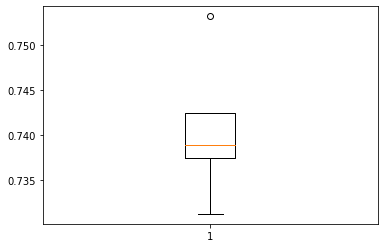

Mean accuracy 0.7406318370650762
Max accuracy 0.7531707317073171


In [199]:
run_cv(forest, X_train_bow, y_train_bow)

* Our very simple Random Forest Classifier with only 10 estimators has achieved a mean cross validated accuracy of ~74%
* Our sentiment classes are unbalanced with the majority class, negative sentiment, comprising 63% of the data.
* Our model performance at ~74% accuracy is better than simply guessing the majority class, so we can say that our model is performing well. However, we would like to see higher accuracy than 74%
* The variance of accuracies coming out of the cross validation is fairly low ~73-76%, so our model is likely not overtraining.
* We will now attempt to improve the model performance by tuning the hyperparameters

##### Tune hyper parameters using example method
There are many ways to tune hyper parameters. I will first perform the way shown in the example notebooks in this module of the course. I will then use a RandomSeachCV to perform a cross validated random search over a broad range of hyperparamters.

In [172]:
# K-Fold Cross - validation .
base_ln = [x for x in range(1, 25)]
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_bow, y_train_bow, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

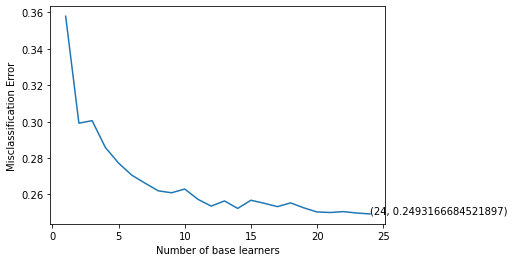

In [173]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [174]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train_bow, y_train_bow)
clf.score(X_test_bow, y_test_bow)

0.7529599271402551

* Using the tuning method shown in the example notebooks, the number of learners in the random forest increased from 10 to 24. The accuracy score on the test data was 75%
* Below we will attempt to tune the model using RandomSeachCV and see if we can increase the accuracy with a wider search.

##### Tune hyper parameters using RandomSeachCV

In [175]:
%%time
#Creating pipeline
forest_tuned = RandomForestClassifier() 

#Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(1,300,1),
            'min_samples_split':np.arange(1,20,1),
            'max_features':('sqrt','log2','None')
            }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=forest_tuned, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_bow,y_train_bow)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 296, 'min_samples_split': 4, 'max_features': 'log2'} with CV score=0.7685403706745706:
Wall time: 7min 49s


In [200]:
# Now let's run a cross validation using the best paramters and compare with our original model
forest_tuned_bow = RandomForestClassifier(n_estimators = 296, min_samples_split = 4, max_features = 'log2')

In [201]:
forest_tuned_bow.fit(X_train_bow, y_train_bow)
forest_tuned_bow.score(X_test_bow, y_test_bow)

0.7768670309653917

* Using RandomSeachCV we have increased our test accuracy to ~78% a small increase, but better than the 75% we saw before.
* The trade-off is that our model now has 296 learners. So it takes longer to run, however the processing time is not unmanageable. Running the model on the test data takes less than a minute. So we will stick with the model from the RandomSearchCV.

##### Evaluate Tuned Model Using Test Data

In [202]:
# Define a function to plot a confusion matrix
def get_cm(classifier,X_data,y_data):
    y_pred = classifier.predict(X_data) # get predicted labels (y) from our input X data

    cm = confusion_matrix(y_data, y_pred) # make the confusion matrix

    df_cm = pd.DataFrame(cm, index = ['Negative','Neutral','Positive'], columns = ['Negative','Neutral','Positive']) # convert the cm to a dataframe with labels
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt='d') # plot a nice looking heatmap of the confusion matrix
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

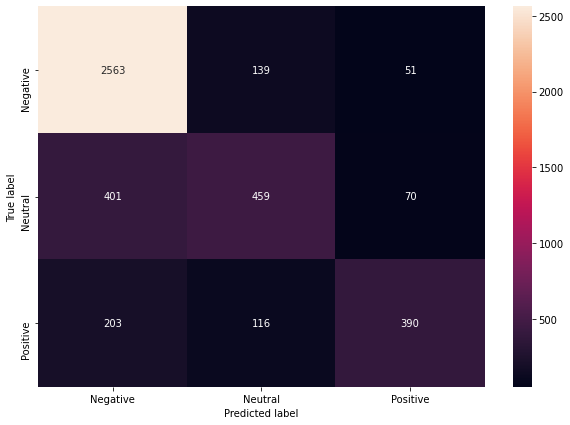

In [203]:
get_cm(forest_tuned_bow,X_test_bow,y_test_bow)

In [204]:
y_pred_bow = forest_tuned_bow.predict(X_test_bow)
print(classification_report(y_test_bow, y_pred_bow))

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      2753
     neutral       0.64      0.49      0.56       930
    positive       0.76      0.55      0.64       709

    accuracy                           0.78      4392
   macro avg       0.74      0.66      0.69      4392
weighted avg       0.77      0.78      0.76      4392



**Observations**
* The majority class is negative sentiment. We can see that the majority class has been classified better than the other classes with the highest precision, recall and f1-score.
* We can also see that the model will falsely classify a negative sentiment as neutral more often than positive. This makes sense as it is easier to tell the difference between the two extremes as opposed to one extreme and the middle.
* The same is not true for the positive class. The model has classified 203 positive tweets as negative; it has falsely predicted positive tweets as negative more often than misclassifying positive tweets as neutral.
* The neutral class has the lowest precision and recall. This is back in line with our expectations. We expect the extremes to be easier to classify than the middle-of-the-road sentiment. We can also see that, when the neutral class is misclassified, it is misclassified as negative (the majority class) as expected.

##### Print Top 40 Features and Plot Their Word Cloud

thanks,thank,not,hour,jetblue,great,usairways,no,flight,united,southwestair,awesome,love,cancelled,customer,delayed,bag,americanair,virginamerica,hold,get,amazing,time,delay,dm,best,service,would,please,still,call,plane,airline,help,good,need,hr,waiting,guy,day,
 
 


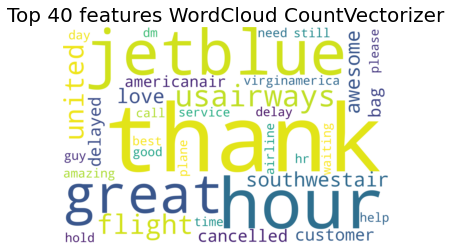

In [215]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=forest_tuned_bow.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=3000, 
                          height=2000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(40, 40), frameon='equal')
plt.title('Top 40 features WordCloud CountVectorizer', fontsize=20)
plt.axis("off")
plt.show()

**Observations**
* Our highest ranked words were the noun "thanks" and the verb "thank". Given that positive sentiment was our minority class, words that indicate positive sentiment likely lead branches of our decision tree learners quickly to high purity leaves.
* Similarly the word "not" was a highly rated feature. This word was likely a good discriminator of negative sentiment.
* We can also see words that strongly indicate positive or negative sentiment. For example, love, amazing, best, good are all indicators of positive sentiment, while cancelled, delay, worst and waiting are all strong indicators of negative sentiment.

## Run Model and Tune Using TF-idf Input
We will create a random forest classification model using the training data. This time we will input the data vectorized by the TfidfVectorizer. We will then evaluate it using a cross-validation. We will then attempt to tune the model using the method shown in the course material and RandomSearch. Finally, we will evaluate the model on our test data.

##### Initial Model and Performance

In [182]:
# Initialize a Random Forest classifier with 10 trees
forest = RandomForestClassifier(n_estimators = 10,n_jobs=-1) 

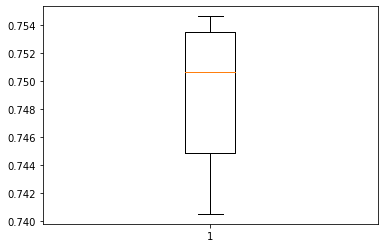

Mean accuracy 0.7488296730112249
Max accuracy 0.7546341463414634


In [205]:
run_cv(forest, X_train_idf, y_train_idf)

* Using our simple base model with the TF-idf input data, we see a very slight increase in accuracy compared to before (74.8% up from 74.1%)

##### Tune Hyper Parameters using example method

In [184]:
# K-Fold Cross - validation .
base_ln = [x for x in range(1, 25)]
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_idf, y_train_idf, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

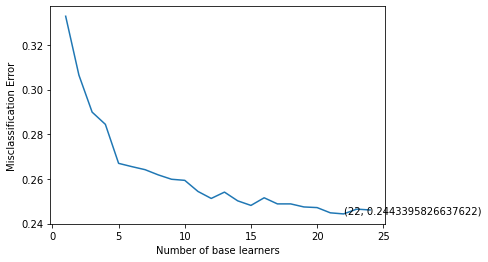

In [185]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [186]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train_idf, y_train_idf)
clf.score(X_test_idf, y_test_idf)

0.7575136612021858

* Using the tuning method shown in the example notebooks, the number of learners in the random forest increase from 10 to 22. This improved the accuracy from 74.1% to 75.8%
* Below we will attempt to tune the model using RandomSeachCV and see if we can get increase the accuracy with a wider search.

##### Tune Hyper Parameters using RandomSeachCV

In [187]:
%%time
#Creating pipeline
forest_tuned = RandomForestClassifier() 

#Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(1,300,1),
            'min_samples_split':np.arange(1,20,1),
            'max_features':('sqrt','log2','None')
            }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=forest_tuned, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_idf,y_train_idf)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 122, 'min_samples_split': 11, 'max_features': 'log2'} with CV score=0.7668817864752586:
Wall time: 9min 12s


In [206]:
# Now let's run a cross validation using the best paramters and compare with our original model
forest_tuned_idf = RandomForestClassifier(n_estimators = 122, min_samples_split = 11, max_features = 'log2')

In [207]:
forest_tuned_idf.fit(X_train_idf, y_train_idf)
forest_tuned_idf.score(X_test_idf, y_test_idf)

0.7668488160291439

* The RandomSeachCV has improved the accuracy to 76.7%, sligthly better than the method used in the example notebooks. We will again use the model from the RandomSeachCV

##### Evaluate Model Using Test Data

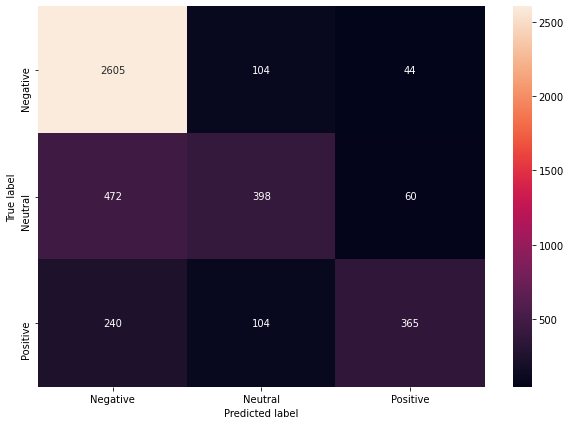

In [208]:
#forest_tuned_idf.fit(X_train_idf,y_train_idf)
get_cm(forest_tuned_idf,X_test_idf,y_test_idf)

In [209]:
y_pred = forest_tuned_idf.predict(X_test_idf)
print(classification_report(y_test_idf, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      2753
     neutral       0.66      0.43      0.52       930
    positive       0.78      0.51      0.62       709

    accuracy                           0.77      4392
   macro avg       0.74      0.63      0.67      4392
weighted avg       0.76      0.77      0.75      4392



* Given that the metics for this model are very similar to the model we ran using the CountVectorizer input, the statements we made before regarding the model output are applicable here.
* We will discuss the differences in preformance between the CountVectorizer input model and TF-idf input model in the summary below.

thanks,thank,not,jetblue,southwestair,americanair,hour,great,usairways,united,flight,no,virginamerica,awesome,love,dm,amazing,customer,cancelled,hold,delayed,please,bag,good,best,get,service,much,delay,would,plane,call,time,hi,airline,know,need,help,fleek,worst,
 
 


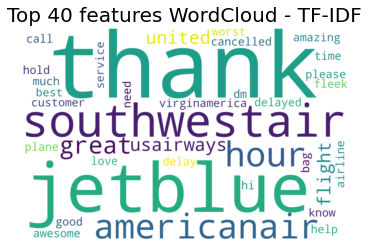

In [217]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=forest_tuned_idf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=3000, 
                          height=2000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(40, 40), frameon='equal')
plt.title('Top 40 features WordCloud - TF-IDF', fontsize=20)
plt.axis("off")
plt.show()

# Summarize your understanding of the application of Various Pre-processing and Vectorization and the performance of your model on this dataset. (6 Marks)


### Comparison of the two models
* It appears that, in this case, the CountVectorizer input into the model has worked better (slightly) than the TF-idf Vectorizer. 
* The overall accuracy with the CountVectorizer input is 78%, with TF-idf input 77%.
* If we compare the confusion matrix of the two methods:
    - CountVectorizer has correctly classified 2563 true negatives, LESS than TF-idf with 2605 true negatives.
    - CountVectorizer has correctly classified 459 true neutrals, MORE than TF-idf with 398 true neutrals.
    - CountVectorizer has correctly classified 390 true positives, MORE than TF-idf with 365 true positives.
* In the Background and Context section it mentions, "there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business." If we are simply interested in detecting negative sentiment, then the TF-idf method is our preferred model. However, if we are interested in correctly classifying all sentiments, the CountVectorizer has worked better in this case.

#### Top 40 Words in CountVectorizer method
thanks,thank,not,hour,jetblue,great,usairways,no,flight,united,southwestair,awesome,love,cancelled,customer,delayed,bag,
americanair,virginamerica,hold,get,amazing,time,delay,dm,best,service,would,please,still,call,plane,airline,help,good,need,
hr,waiting,guy,day

#### Top 40 Words in TF-idf Vectorizer method
thanks,thank,not,jetblue,southwestair,americanair,hour,great,usairways,united,flight,no,virginamerica,awesome,love,dm,
amazing,customer,cancelled,hold,delayed,please,bag,good,best,get,service,much,delay,would,plane,call,time,hi,airline,know,
need,help,fleek,worst,

* The two models have very similar words in the top 40, the top 3 for both models are exactly the same. 8 of the top 10 features are exactly the same for both models. So we can say that, in this case, both methods of vectorization have produced similar results.
* What is interesting is that, the airline names actually appear higher on the list for the TF-idf method. We would expect the airline names to be repeated often and therefore de-emphasized by the TF-idf method. However, we did use random forest as our classification method, which is somewhat insensitive to scaling, so the fact that the TF-idf method may have assigned a low value to the airline names may not have mattered as much.

## Overall Summary 

* We were given a data set of 14640 tweets all expressing either positive, neutral or negative sentiment about 6 different airlines. Our task was to create a classification model which would read the input text of a tweet and then predict the sentiment expressed.
* After an exploratory data analysis, we dropped columns to simply the text (X data) and the sentiment/labels (y data).
* We then went about pre-processing the text. We need pre-processing because textual data is unstructured and cannot be processed as it is. Text data also contains a lot of non-required items such as special characters, punctuations, etc. In order to ‘clean’ the text data of the non-required items we performed the following steps:
    - Removal of html tags and urls
    - Expanding contractions like don’t, won’t, etc. to do not, will not, etc.
    - We then ‘Tokenized’ the data so that we could process each individual word, rather than the full text.
    - We then removed numbers, special characters and punctuations.
    - We then removed stopwords, i.e., words that are so common that they are essentially meaningless to a sentiment analysis. However, we were careful to retain two common stopwords: not and no. These words are important to sentiment analysis and both appear high on our list of top features for both the classification models that we built. **Note:** I attempted the classification both with and without “not” and “no” in the stopwords. The models performed better (i.e. had higher accuracy) when “not” and “no” were not removed with the other stopwords.
    - We then converted all uppercase letters to lowercase. The model doesn’t know that “Hello” and “hello” are the same word. If we left upper case letters in the document then our Document Term Matrix (DTM) would create columns for “Hello” and “hello”. This would unnecessarily increase the dimensionality of our DTM without adding value. Converting to lowercase is a simple step that reduces the dimensionality of the DTM.
    - We then Lemmatized the words. This is another tool to reduce the dimensionality of the DTM. In our work above we saw the word commercials was reduced to its lemma commercial. A lemma is the root, or dictionary version of a word, free of pluralization or conjugation. By reducing all words in the document to their lemmas we reduce the dimensionality without really reducing the information in the DTM.
    - Our final step of pre-processing was to convert the tokenized words back to pre-processed text.
* To input the pre-processed text into a machine learning model we need to convert the textual data into numbers. This process is called vectorization.
* We employed two methods of vectorization. The first was CountVectorizer where each word in the corpus gets a column, and we simply count the number of times a word occurs in each row. We limited the total number of words/columns to 1000. So only the top 1000 words of in 14640 tweets (after pre-processing) had a column.
* The second method of vectorization we employed is called Term Frequency Inverse Document Frequency or TF-IDF. TF-IDF is a scheme to weight individual words. Words that occur very frequently, and therefore likely provide less information, are given less weight.
* With our data vectorized, we build two classification models, one for each vectorization method. We used the Random Forest ensemble method as our model choice. We attempted to tune each model 2 different ways, with RandomSearchCV providing the best set of hyperparameters.
* Both classification models yielded similar results. 77-78% accuracy in classifying the three sentiments. The models were better at classifying the majority sentiment (negative) compared to the other sentiments. This is common in unbalanced data. However, given that the majority sentiment was 63% of the data and our models had an accuracy of 77-78%, we can say that the model is certainly performing better than a ‘dumb’ model, which simply predicts the majority class. 
* If we are mainly concerned with classifying negative sentiment, so that brands can quickly detect negative social mentions that could harm their business, then the TF-IDF model worked the best, correctly classifying 2605 of the 2753 negative sentiments (94.6%), compared to the CountVectorizer model that correctly classified 2563 of the 2753 negative sentiments (93.1%).
* However, the CountVectorizer model did perform slightly better overall, correctly predicting more neutral and positive sentiments than the TF-IDF model.
* The similar performance of both models is likely due to the fact that we used RandomForest, a decision tree based ensemble method as our classification algorithm. In decision trees, the scaling of each individual feature is not as important. At any given node, the decision tree “looks” at the distribution of a feature, finds a value to split into two different nodes and then moves to the next node. While the scaling of the values does make some difference, it’s not as pronounced in a decision tree based algorithm as some other algorithms. That is why our CountVectorizer and TF-IDF inputs produced similar results.
